### Import necessary modules

In [51]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

### Read poem txt file

In [57]:
with open('irish_lyrics.txt','r') as f:
    data = f.read()
print(type(data))

<class 'str'>


### Tokenization

In [58]:
tokenizer = Tokenizer()

corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(total_words)
corpus

2690


['come all ye maidens young and fair',
 'and you that are blooming in your prime',
 'always beware and keep your garden fair',
 'let no man steal away your thyme',
 'for thyme it is a precious thing',
 'and thyme brings all things to my mind',
 'nlyme with all its flavours, along with all its joys',
 'thyme, brings all things to my mind',
 'once i and a bunch of thyme',
 'i thought it never would decay',
 'then came a lusty sailor',
 'who chanced to pass my way',
 'and stole my bunch of thyme away',
 'the sailor gave to me a rose',
 'a rose that never would decay',
 'he gave it to me to keep me reminded',
 'of when he stole my thyme away',
 'sleep, my child, and peace attend thee',
 'all through the night',
 'guardian angels god will send thee',
 'soft the drowsy hours are creeping',
 'hill and dale in slumber sleeping',
 'i my loving vigil keeping',
 'while the moon her watch is keeping',
 'while the weary world is sleeping',
 'oer thy spirit gently stealing',
 'visions of delight rev

### Sequencing

In [59]:
sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        sequences.append(n_gram_sequence)
sequences

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69],
 [2, 11],
 [2, 11, 15],
 [2, 11, 15, 31],
 [2, 11, 15, 31, 361],
 [2, 11, 15, 31, 361, 8],
 [2, 11, 15, 31, 361, 8, 24],
 [2, 11, 15, 31, 361, 8, 24, 1218],
 [272, 798],
 [272, 798, 2],
 [272, 798, 2, 204],
 [272, 798, 2, 204, 24],
 [272, 798, 2, 204, 24, 579],
 [272, 798, 2, 204, 24, 579, 69],
 [118, 35],
 [118, 35, 119],
 [118, 35, 119, 799],
 [118, 35, 119, 799, 56],
 [118, 35, 119, 799, 56, 24],
 [118, 35, 119, 799, 56, 24, 184],
 [10, 184],
 [10, 184, 25],
 [10, 184, 25, 23],
 [10, 184, 25, 23, 5],
 [10, 184, 25, 23, 5, 580],
 [10, 184, 25, 23, 5, 580, 456],
 [2, 184],
 [2, 184, 800],
 [2, 184, 800, 12],
 [2, 184, 800, 12, 801],
 [2, 184, 800, 12, 801, 4],
 [2, 184, 800, 12, 801, 4, 7],
 [2, 184, 800, 12, 801, 4, 7, 235],
 [1219, 17],
 [1219, 17, 12],
 [1219, 17, 12, 75],
 [1219, 17, 12, 75, 1220],
 [1219, 17, 12, 75, 1220, 236],
 [1219, 17, 12, 75, 1

### Padding

In [60]:
max_sequence_len = max([len(i) for i in sequences])
max_sequence_len

16

In [85]:
sequences = pad_sequences(sequences, padding = 'pre', maxlen = max_sequence_len)
sequences = np.array(sequences)
sequences

array([[   0,    0,    0, ...,    0,   51,   12],
       [   0,    0,    0, ...,   51,   12,   96],
       [   0,    0,    0, ...,   12,   96, 1217],
       ...,
       [   0,    0,    0, ...,    0,   47,  105],
       [   0,    0,    0, ...,   47,  105,  138],
       [   0,    0,    0, ...,  105,  138,  184]], dtype=int32)

### Labelling

We can take the last elements as labels and the other to be x

In [86]:
x = sequences[:, :-1]
labels = sequences[:, -1:]
labels

array([[  12],
       [  96],
       [1217],
       ...,
       [ 105],
       [ 138],
       [ 184]], dtype=int32)

### One-hot encoding labels

In [89]:
y = tf.keras.utils.to_categorical(labels, num_classes = total_words)
print(y[0][9:15])
print(y[1][93:99])
y[2][1217]

[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0.]


1.0

### Build model

In [94]:
model = Sequential()
# we use max_sequence_len -1 because we used the last element as label
model.add(Embedding(total_words, 240, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation = 'softmax'))
adam = Adam(learning_rate = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

### Train model

In [93]:
history = model.fit(x, y, epochs=100, verbose=1)

Epoch 1/100


2024-02-14 13:21:10.887574: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 129528880 exceeds 10% of free system memory.


377/377 [==============================] - 37s 86ms/step - loss: 6.6499 - accuracy: 0.0750
Epoch 2/100
377/377 [==============================] - 33s 89ms/step - loss: 5.7167 - accuracy: 0.1210
Epoch 3/100
377/377 [==============================] - 33s 88ms/step - loss: 4.8735 - accuracy: 0.1671
Epoch 4/100
377/377 [==============================] - 33s 89ms/step - loss: 4.3870 - accuracy: 0.2076
Epoch 5/100
377/377 [==============================] - 34s 91ms/step - loss: 4.1559 - accuracy: 0.2459
Epoch 6/100
377/377 [==============================] - 33s 88ms/step - loss: 3.3296 - accuracy: 0.3190
Epoch 7/100
377/377 [==============================] - 33s 88ms/step - loss: 2.6892 - accuracy: 0.4004
Epoch 8/100
377/377 [==============================] - 33s 88ms/step - loss: 2.3600 - accuracy: 0.4645
Epoch 9/100
377/377 [==============================] - 34s 90ms/step - loss: 2.1640 - accuracy: 0.4964
Epoch 10/100
377/377 [==============================] - 35s 92ms/step - loss: 1.9132 

Epoch 80/100
377/377 [==============================] - 35s 92ms/step - loss: 1.1615 - accuracy: 0.7405
Epoch 81/100
377/377 [==============================] - 35s 92ms/step - loss: 1.2228 - accuracy: 0.7275
Epoch 82/100
377/377 [==============================] - 35s 92ms/step - loss: 1.2303 - accuracy: 0.7259
Epoch 83/100
377/377 [==============================] - 35s 92ms/step - loss: 1.2566 - accuracy: 0.7211
Epoch 84/100
377/377 [==============================] - 35s 92ms/step - loss: 1.2218 - accuracy: 0.7297
Epoch 85/100
377/377 [==============================] - 35s 92ms/step - loss: 1.3140 - accuracy: 0.7213
Epoch 86/100
377/377 [==============================] - 35s 92ms/step - loss: 1.3722 - accuracy: 0.7092
Epoch 87/100
377/377 [==============================] - 35s 92ms/step - loss: 1.2894 - accuracy: 0.7212
Epoch 88/100
377/377 [==============================] - 35s 93ms/step - loss: 1.2619 - accuracy: 0.7279
Epoch 89/100
377/377 [==============================] - 31s 83ms

### Plot graphs

In [96]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

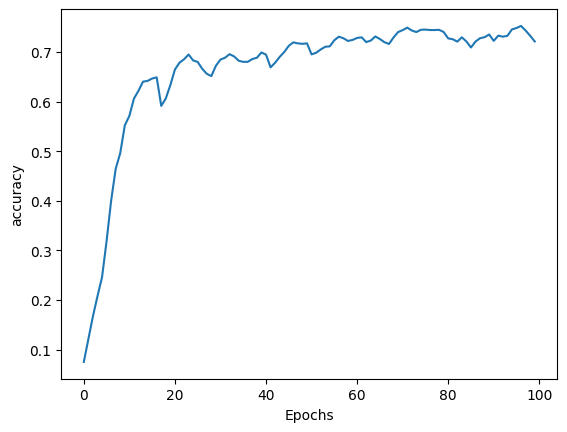

In [97]:
plot_graphs(history, 'accuracy')

### Generate text

In [107]:
seed_text = "I made a poetry machine"
seed_text = "I've got a bad feeling about this"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen = max_sequence_len-1, padding = 'pre')
    predicted = np.argmax(model.predict(token_list, verbose = 0))
    output_word = ""
    
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this coins ould ould ould along along sleeping sleeping farming farming whirring leaning leaning since since cousin since cousin since meadow lay penny penny yearn brave brave midst outside clouded on spinning am am musha treasures sold sold fears whispers flock tapping prove rare sound sound prince fireside neatest neatest ring vowed vowed rogue trust chance words got shalt walkin shalt smiled cleared cleared cleared cleared cleared single axe mither though story though loud loud loud passed loud loud gathered remain south south li li three three three bullet three musha body herring slept oer locality deceive them them sped them
